In [1]:
# Import Dependencies
import pandas as pd
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [29]:
# Read the csv file into a pandas DataFrame
HREemployee_df = pd.read_csv("HREmployeeAttrition.csv")
HREemployee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
# Select our independent X variables, and our dependent y variable. 
y = HREemployee_df['Attrition']
X = HREemployee_df[['Age','DistanceFromHome',
                 'Education','JobSatisfaction',
                 'MonthlyIncome','PercentSalaryHike',
                 'PerformanceRating','StockOptionLevel',
                 'WorkLifeBalance','YearsSinceLastPromotion']]

In [7]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
attrition = len(y[y==1])
no_attrition = len (y[y==0])
tot = len(y)

print(f"Attrition = {attrition}")
print(f"No Attrition = {no_attrition}")
print(f"Total number = {tot}")
print(f"Attrition rate of dataset = {round(attrition/tot*100,3)}%")
print(f"No attrition = {round(no_attrition/tot*100,3)}%")

Attrition = 237
No Attrition = 1233
Total number = 1470
Attrition rate of dataset = 16.122%
No attrition = 83.878%


### Imbalanced

In [8]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [9]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
attrition_tst = len(y_test[y_test==1])
no_attrition_tst = len (y_test[y_test==0])
tot_tst = len(y_test)

print(f"Attrition = {attrition_tst}")
print(f"No Attrition = {no_attrition_tst}")
print(f"Total number = {tot_tst}")
print(f"Attrition rate of dataset = {round(attrition_tst/tot_tst*100,3)}%")
print(f"No attrition = {round(no_attrition_tst/tot_tst*100,3)}%")

Attrition = 58
No Attrition = 236
Total number = 294
Attrition rate of dataset = 19.728%
No attrition = 80.272%


In [10]:
# Create a Linear Regression model object
lin_model = LogisticRegression(solver = 'liblinear')

In [11]:
# Train the model using the training datasets
lin_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Make predictions using the testing dataset
y_pred = lin_model.predict(X_test)

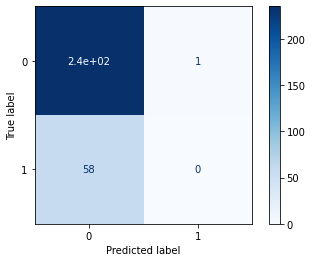

In [19]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lin_model, X_test, y_test, cmap = plt.cm.Blues)

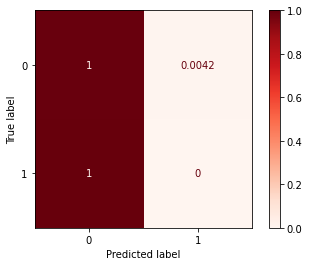

In [20]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lin_model, X_test, y_test, cmap = plt.cm.Reds, normalize = 'true')

In [21]:
# Print classification report
print(classification_report(y_test, y_pred, target_names = ["No attrition", "Attrition"]))

              precision    recall  f1-score   support

No attrition       0.80      1.00      0.89       236
   Attrition       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.44       294
weighted avg       0.64      0.80      0.71       294



### Balanced

In [22]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [23]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
attrition_tst = len(y_test[y_test==1])
no_attrition_tst = len (y_test[y_test==0])
tot_tst = len(y_test)

print(f"Attrition = {attrition_tst}")
print(f"No Attrition = {no_attrition_tst}")
print(f"Total number = {tot_tst}")
print(f"Attrition rate of dataset = {round(attrition_tst/tot_tst*100,3)}%")
print(f"No attrition = {round(no_attrition_tst/tot_tst*100,3)}%")

Attrition = 47
No Attrition = 247
Total number = 294
Attrition rate of dataset = 15.986%
No attrition = 84.014%


In [24]:
# Create the Linear Regression model object
lin_model_bal = LogisticRegression(solver = 'liblinear')

In [25]:
# Train the model using the training sets
lin_model_bal.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions using the testing dataset
y_pred = lin_model_bal.predict(X_test)

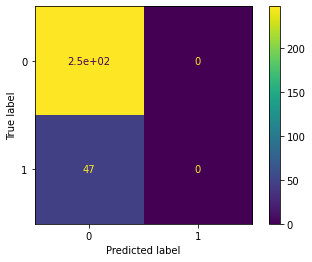

In [26]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lin_model_bal, X_test, y_test)

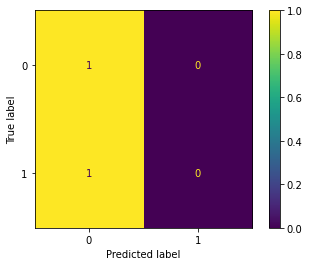

In [27]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lin_model_bal, X_test, y_test, normalize = 'true')

In [28]:
# Print classification report
print(classification_report(y_test, y_pred, target_names = ['No Attrition', 'Attrition'] ))

              precision    recall  f1-score   support

No Attrition       0.84      1.00      0.91       247
   Attrition       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

